# <b><span style="color:blue;">SPACE MISSIONS</span></b>

The datasheet is collected from nextspaceflight.com and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union, from 1957 up to February 2024.  
The following analysis will seek to further understand the scope, the frequency and the prevalence of global space missions throughout modern history. 

![Space Mission Image](https://cdn.mos.cms.futurecdn.net/M6EAv9dZMDAE84hhrQ5ZRk-1200-80.jpg)

In [1173]:
# import libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from sklearn.linear_model import LinearRegression

In [1174]:
# import the space missions dataset from kaggle.com

missions_df = pd.read_csv('all_space_mission_launches.csv', sep=',')

missions_df.head()

,Unnamed: 0,Organisation,Location,Datetime,Details,Rocket_Status,Price,Mission_Status
0,0,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Feb 09, 2024 07:03 UTC",Soyuz 2.1v | Cosmos 2575,Active,NaN,Success
1,1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Thu Feb 08, 2024 06:33 UTC",Falcon 9 Block 5 | PACE,Active,67.0,Success
2,2,CASC,"Bo Run Jiu Zhou Barge (Area 2), China Coastal ...","Sat Feb 03, 2024 03:06 UTC",Jielong-3 | 9 satellites,Active,NaN,Success
3,3,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Feb 02, 2024 23:37 UTC",Long March 2C | Geely Constellation Group 02,Active,30.8,Success
4,4,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Wed Jan 31, 2024 06:34 UTC",Electron/Curie | Four Of A Kind,Active,7.5,Success


# <span style="font-size:24px; color:orange;">BASIC INVESTIGATION OF DATA</span> 


In [1175]:
# take five random samples from the dataset 

missions_df.sample(5)

,Unnamed: 0,Organisation,Location,Datetime,Details,Rocket_Status,Price,Mission_Status
4769,269,US Air Force,"SLC-17A, Cape Canaveral SFS, Florida, USA","Fri Jan 28, 1977 00:50 UTC",Delta 2914 | NATO 3B,Retired,NaN,Success
6494,494,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Sat Oct 20, 1962 04:00 UTC",Cosmos-1 (65S3) | Cosmos 11,Retired,NaN,Success
6148,148,US Air Force,"SLC-5, Vandenberg SFB, California, USA","Sat Mar 26, 1966 03:31 UTC",Scout A | Transit-O 8,Retired,NaN,Success
4434,1434,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Tue Aug 28, 1979 00:17 UTC",Molniya-M /Block 2BL | Cosmos 1124,Retired,NaN,Success
2789,1289,Boeing,"SLC-17A, Cape Canaveral SFS, Florida, USA","Thu Mar 10, 1994 03:40 UTC",Delta II 7925 | USA-100 (GPS IIA-15)/SEDS-2,Retired,NaN,Success


In [1176]:
missions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6711 non-null   int64  
 1   Organisation    6711 non-null   object 
 2   Location        6711 non-null   object 
 3   Datetime        6711 non-null   object 
 4   Details         6711 non-null   object 
 5   Rocket_Status   6711 non-null   object 
 6   Price           2637 non-null   float64
 7   Mission_Status  6711 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 419.6+ KB


NOTE: Significant amount of price data is missing i.e. Price only has 2637 entries out of 6711 records

In [1177]:
missions_df.shape

(6711, 8)

NOTE: This tells us that our dataset is comprised of 6711 columns and 8 records

In [1178]:
missions_df.describe()

,Unnamed: 0,Price
count,6711.000000,2637.000000
mean,654.061243,69.162321
std,423.680057,101.440856
min,0.000000,2.500000
25%,279.000000,20.000000
50%,611.000000,30.000000
75%,1005.000000,67.000000
max,1499.000000,876.000000


NOTE: The describe command provides a summary overview of the dataset but since only the index and the price columns are numerical, 
it only returns summary information for these two columns.

The index column data (unnamed) is meaningless in this example, asides from the count function which confirms the number of records.  
The price column, however, contains more useful information e.g. average price of missions is $69m

# <span style="font-size:24px; color:orange;">DATA ISSUES</span> 

On initial investigation of the data, it became clear that the Datetime records were inconsistent on a number of entries, missing the time and timezone.  

To remedy this I decided to individually amend the records to allow for consistent analysis.  The other option would have been to drop the records from
the dataset but this would potentially affect the integrity of the data and the quality of the findings.  As the time data was not relevant to the analysis
of missions per year, I decided to amend and update the records with a generic time of 01:00 and a timezone of UTC.

In [1179]:
# Define the correct datetime string for record 228
correct_datetime = 'Sat Mar 04, 2023 01:00 UTC'

# Update the record at indexc 228
missions_df.at[228, 'Datetime'] = correct_datetime

# Confirm that the record is updated
print(missions_df.loc[228, 'Datetime'])

Sat Mar 04, 2023 01:00 UTC


In [1180]:
# Define the correct datetime string for record 376
correct_datetime = 'Sun Jun 26, 2022 01:00 UTC'

# Update the record at indexc 376
missions_df.at[376, 'Datetime'] = correct_datetime

# Confirm that the record is updated
print(missions_df.loc[376, 'Datetime'])

Sun Jun 26, 2022 01:00 UTC


# <span style="font-size:24px; color:orange;">DATA CLEANING</span> 

At this stage it became clear that the Datetime column was missing the time and timezone values on more than a few entries. To remedy this, the chosen generic value of 01:00 UTC was added to all entries
that were missing the information, to ensure all Datetime records were complete for analysis purposes.

Since there are a number of missing entries in the data,  dropping records is unlikely to yield good results. This is because valuable data would be lost, and so imputation was used to provide better results.

In [1181]:
# Multiple Datetime entries within the Dataframe are missing the time values

# Define the missing entries without a time and timezone and append with a time entry of ' 01:00 UTC'
missions_df['Datetime'] = missions_df['Datetime'].apply(
    lambda x: x + ' 01:00 UTC' 
    if len(x) == 16
else x
) 

In [1182]:
# Verify the fix has worked
print(missions_df.loc[597, 'Datetime'])


Mon Feb 01, 2021 01:00 UTC


# <span style="font-size:24px; color:orange;">DATA ANALYSIS</span> 

With a the 'Datetime' column data now complete, the analysis could continue.

In [1183]:
# Convert the existing Datetime string values into objects
missions_df['Datetime'] = pd.to_datetime(missions_df['Datetime'], format='%a %b %d, %Y %H:%M %Z', utc=True)


In [1184]:
# Plot a graph of the number of annual space missions 

missions_df['Year'] = pd.to_datetime(missions_df['Datetime'], format='%Y')

missions_per_year = missions_df['Year'].dt.year.value_counts().sort_index()

fig = px.line(x=missions_per_year.index, y=missions_per_year.values, title='CHART 1: Space Missions Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Annual Space Missions', showlegend=False)
fig.show()

# <span style="font-size:24px; color:orange;">CHART 1 ANALYSIS: ANNUAL SPACE MISSIONS</span> 

The findings demonstrate a significant increase in mission frequency in recent years, with a peak total of 232 space missions taking place in 2023.  This is likely due to the increased activity from private companies, 
such as SpaceX, with 98 launches alone in that year. The second highest peak in mission activity took place in 1967 with 140 taking place, which marks the height of the 'Space Race' that took place in the 1960s between the USSR and the USA. Major advancements in space 
exploration took place during this time with key events including the launch of Sputnik by the Soviets and the Apollo Moon landing by the USA. The sharp fall is a result of the data being incomplete for 2024 and only 
capturing mission data upto February 2024.



The next stage of analysis was to explore spending by country, however, having identified from the sample data earlier, a number of entries were recorded as 'Missing Values' so a check was needed to confirm the volume of missing data in the Price column.

In [1185]:
# Number of missing values in Price column of dataset
missing_val_count_by_column = (missions_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Price    4074
dtype: int64


Out of 6711 records, 4074 price records have no values!!  The two options availble were to drop the records with no values, or to use imputation and take the mean price and replace the missing entries, therefore, retaining more data. I decided to experiment to see which method would yield better results.

In [1186]:
# Drop NAN entries from Price column
price_drop_missions_df = missions_df.dropna(subset=['Price'])

In [1187]:
# Check size of amended Dataframe to show reduction in number of records, having dropped all those without Price data
price_drop_missions_df.describe

<bound method NDFrame.describe of       Unnamed: 0  Organisation  \
1              1        SpaceX   
3              3          CASC   
4              4    Rocket Lab   
5              5        SpaceX   
6              6        SpaceX   
...          ...           ...   
6098          98  US Air Force   
6264         264  US Air Force   
6294         294  US Air Force   
6310         310  US Air Force   
6341         341  US Air Force   

                                            Location  \
1           SLC-40, Cape Canaveral SFS, Florida, USA   
3       LC-3, Xichang Satellite Launch Center, China   
4     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
5           SLC-40, Cape Canaveral SFS, Florida, USA   
6            SLC-4E, Vandenberg SFB, California, USA   
...                                              ...   
6098         SLC-4W, Vandenberg SFB, California, USA   
6264        SLC-20, Cape Canaveral SFS, Florida, USA   
6294        SLC-20, Cape Canaveral SFS, Florida, USA 

Clearly the dataset is significantly reduced and only 2637 records remain, having dropped the records without Price data.

In [1188]:
# take thirty random samples from the revised dataset to check that 'NaN' records were no longer included
price_drop_missions_df.sample(30)

,Unnamed: 0,Organisation,Location,Datetime,Details,Rocket_Status,Price,Mission_Status,Year
553,253,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2021-05-26 18:59:00+00:00,Falcon 9 Block 5 | Starlink V1 L28,Active,67.00,Success,2021-05-26 18:59:00+00:00
2820,1320,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1993-10-18 14:53:00+00:00,Space Shuttle Columbia | STS-58,Retired,450.00,Success,1993-10-18 14:53:00+00:00
677,377,Rocket Lab,"Rocket Lab LC-1A, Māhia Peninsula, New Zealand",2020-07-04 21:19:00+00:00,Electron/Curie | Pics Or It Didn’t Happen,Active,7.50,Failure,2020-07-04 21:19:00+00:00
1507,7,ILS,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2011-09-29 18:31:00+00:00,Proton-M/Briz-M | QuetzSat-1,Active,65.00,Success,2011-09-29 18:31:00+00:00
3943,943,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1983-09-09 11:00:00+00:00,Soyuz U | Cosmos 1497,Retired,20.00,Success,1983-09-09 11:00:00+00:00
4118,1118,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1982-05-28 09:10:00+00:00,Soyuz U | Cosmos 1370,Retired,20.00,Success,1982-05-28 09:10:00+00:00
220,220,Rocket Lab,"Rocket Lab LC-2 (LP-0C), Wallops Flight Facili...",2023-03-16 22:38:00+00:00,Electron/Curie | Stronger Together,Active,7.50,Success,2023-03-16 22:38:00+00:00
215,215,Relativity Space,"LC-16, Cape Canaveral SFS, Florida, USA",2023-03-23 03:25:00+00:00,"Terran 1 | Good Luck, Have Fun",Retired,12.00,Failure,2023-03-23 03:25:00+00:00
1131,831,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",2016-01-20 04:01:00+00:00,PSLV-XL | IRNSS-1E,Active,31.00,Success,2016-01-20 04:01:00+00:00
3629,629,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1986-03-19 10:08:00+00:00,Soyuz U2 | Progress 25,Retired,40.00,Success,1986-03-19 10:08:00+00:00


Having confirmed that records with missing values in the price column had been removed, the remaining records were complete and analysis could continue. The first stage of anaylsis would test the impact of dropping the incomplete records on the overall data. It would test for inaccuracy in analysing the prevalence of missions by Organisation.

In [1189]:
# This command counts the total number of missions by organisation, with the reduced dataset
organisation_cat_counts = price_drop_missions_df['Organisation'].value_counts()
print(organisation_cat_counts)

Organisation
RVSN USSR           657
CASC                398
SpaceX              311
Roscosmos           218
VKS RF              153
NASA                137
Arianespace         134
ULA                 115
Northrop             91
ILS                  79
ISRO                 78
Rocket Lab           43
MHI                  43
Starsem              28
US Air Force         26
ExPace               25
Kosmotras            22
Eurockot             13
Galactic Energy      11
Martin Marietta       9
Lockheed              8
Astra                 7
Boeing                7
Virgin Orbit          6
JAXA                  4
Firefly               4
CASIC                 3
Relativity Space      1
OrienSpace            1
ABL SS                1
Sandia                1
GK LS                 1
ESA                   1
EER                   1
Name: count, dtype: int64


Text(0.5, 1.0, 'CHART 2: Missions by Organisation (%)')

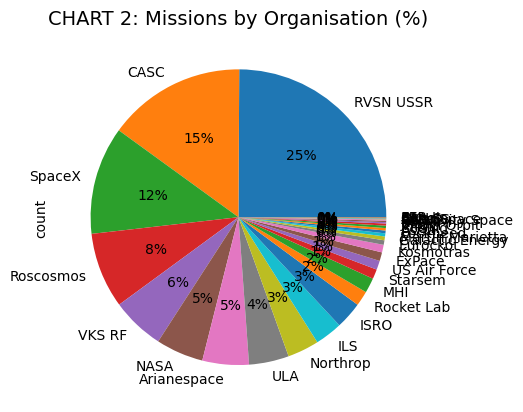

In [1190]:
# Plot pie chart to show percentage of total missions by organisations (based on reduced dataset)
organisation_cat_counts.plot(
    kind='pie', y='Organisation', autopct='%1.0f%%')

#Insert title and label
plt.title('CHART 2: Missions by Organisation (%)', fontsize=14)

# <span style="font-size:24px; color:orange;">CHART 2 ANALYSIS: TOTAL MISSIONS BY ORGANISATION (%)</span> 

Evidently the USSR are shown as being in first place with a quarter of all global space missions, followed by China in second place with 15% and SpaceX in third with 12%. However, as this data only represented those entries in the dataset with Price values, the loss of 4074 records would have likely skewed the results significantly.

The pie chart was also cluttered with many miscellaneous entries that would be better grouped together.  I decided to group any organisations with less than 3% (200 entries approx) into a miscellaneous category.

The full dataset could then plotted which should then demonstrate how inaccurate data findings can be when dropping records from a dataset.

In [1191]:
organisation_cat_counts_full = missions_df['Organisation'].value_counts()
print(organisation_cat_counts_full)

Organisation
RVSN USSR       2476
US Air Force     549
CASC             523
Roscosmos        363
VKS RF           342
                ... 
Sandia             1
OneSpace           1
GK LS              1
Douglas            1
EER                1
Name: count, Length: 66, dtype: int64


In [1192]:
#Count the number of missions by Organisation based on the full original dataset, grouping Organisations which represent less than 3% of the total global missions into a Miscellaneous category

#Count the total entries for each organisation
Organisation_cat_counts_misc = missions_df['Organisation'].value_counts()

#Identify organisations with <=200 entries
threshold = 200
Organisation_cat_counts_grouped = Organisation_cat_counts_misc.copy()
Organisation_cat_counts_grouped[Organisation_cat_counts_misc <= threshold] = 0  #sets the miscellaneous values to 0

#Replace organisations with less than or equal to 200 entries as 'Miscellaneous' in the Dataframe
missions_df['Organisation'] = missions_df['Organisation'].apply(lambda x: x if Organisation_cat_counts_misc[x] > threshold else 'Miscellaneous')

#Calulate the new grouped counts
final_counts = missions_df['Organisation'].value_counts()

print(final_counts)


Organisation
RVSN USSR           2476
Miscellaneous       1370
US Air Force         549
CASC                 523
Roscosmos            363
VKS RF               342
SpaceX               318
Arianespace          297
General Dynamics     251
NASA                 222
Name: count, dtype: int64


Text(0.5, 1.0, 'CHART 3: Total Missions by Organisation (%)')

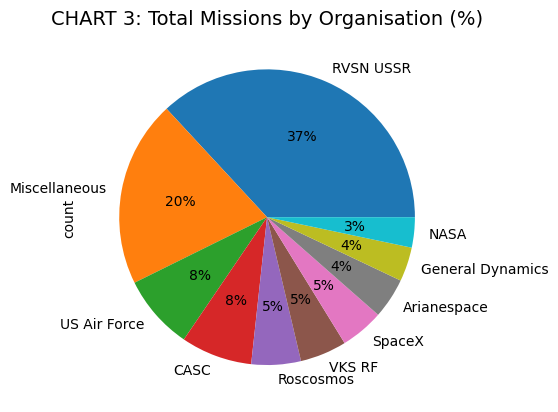

In [1193]:
# Plot pie chart to show percentage of total missions by organisations for full Dataset 
final_counts.plot(
    kind='pie', y='Organisation', autopct='%1.0f%%')

#Insert title and label
plt.title('CHART 3: Total Missions by Organisation (%)', fontsize=14)

# <span style="font-size:24px; color:orange;">CHART 3 ANALYSIS: TOTAL MISSIONS BY ORGANISATION (%)</span> 
This chart is now an accurate representation of the Dataset unlike Chart 2.  The USSR still lead with the total number of missions, however has leapt from 25% to 37%, the US Air Force are in second place, with China now in third.  As SpaceX were in third in the previous graph, this shows how the data was skewed singifcantly by removing records without a Price column entry. This evidences the pitfalls of dropping incomplete data from a dataset as you can obtain wildly inaccurate results.

Having evidenced the negative impact of dropping records on the entire dataset, I was now interested to see how this actually affected the Price data.  The next stage was to analyse spend by organisation. The challenge would be, however, how to treat the missing data for imputation purposes.  Dropping all those records with missing Price data would lose nearly 2/3 of the dataset and yield inaccurate results due to the shear volume of absent data. Additionally, using the mean price data from the entire Price column would significantly skew the results.  I, therefore, decided to use a mean average price value for each organisation, based on the data held, and complete the missing records with actual mean values by organisation.



In [1194]:
# Calculate the mean Price data for each Organisation 

mean_price_by_org = missions_df.groupby('Organisation', dropna=False)['Price'].mean()

print(mean_price_by_org)

Organisation
Arianespace         141.194030
CASC                 39.549698
General Dynamics           NaN
Miscellaneous        65.432338
NASA                453.109489
RVSN USSR            21.613394
Roscosmos            30.342661
SpaceX               65.681672
US Air Force         59.650769
VKS RF               22.195686
Name: Price, dtype: float64


C:\Users\thorn\AppData\Local\Temp\ipykernel_32128\680119410.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




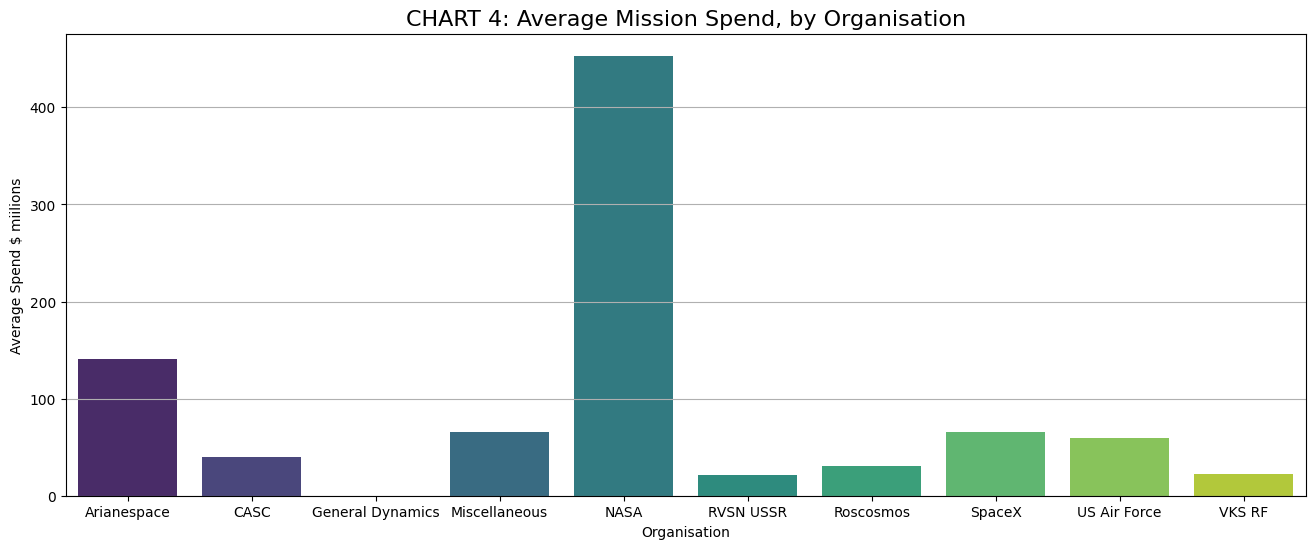

In [1195]:
# Set the width and height of the chart
plt.figure(figsize=(16,6))

# Add title
plt.title("CHART 4: Average Mission Spend, by Organisation", fontsize=16)

# Bar chart showing average price by Organisation
sns.barplot(mean_price_by_org, palette='viridis')

# Add label for vertical axis
plt.ylabel("Average Spend $ miilions")

#Add plot lines to the chart
plt.grid(axis='y')

# <span style="font-size:24px; color:orange;">CHART 4 ANALYSIS: AVERAGE MISSION SPEND, BY ORGANISATION</span>

This chart clearly demonstrated that NASA (USA) incurred the greatest average spend throughout history, based on the Price data held.  This was followed by Arianespace (A French company), and then SpaceX (also USA). Despite the USSR having completed the most global space missions, they had one of lowest mean average mission costs.  This could potentially be due to relative labour costs in each country (with both France and the USA having higher costs) or potentially due to inefficiencies between countries, with the USSR proving to be more efficient in their development and commissioning of space missions, than the competition.  

It is worth noting that it also became clear, at this stage, that no price data was held for General Dynamics and therefore, the investigation could only return a nil response.

In [1196]:
# Create seperate Dataframe with Organisation, Price and Year only
subset_spend=missions_df[['Organisation', 'Price', 'Year']].copy()

subset_spend.head()

,Organisation,Price,Year
0,VKS RF,NaN,2024-02-09 07:03:00+00:00
1,SpaceX,67.0,2024-02-08 06:33:00+00:00
2,CASC,NaN,2024-02-03 03:06:00+00:00
3,CASC,30.8,2024-02-02 23:37:00+00:00
4,Miscellaneous,7.5,2024-01-31 06:34:00+00:00


In [1197]:
# Extract only the year
subset_spend['Year'] = subset_spend['Year'].dt.year 

# Display the updated subset data
print(subset_spend.head())

    Organisation  Price  Year
0         VKS RF    NaN  2024
1         SpaceX   67.0  2024
2           CASC    NaN  2024
3           CASC   30.8  2024
4  Miscellaneous    7.5  2024


In [1198]:
# Drop all records without price data
subset_spend = subset_spend.dropna(subset=['Price'])

# Display the update subset data following dropping of records with no price data
print(subset_spend.head())

    Organisation  Price  Year
1         SpaceX   67.0  2024
3           CASC   30.8  2024
4  Miscellaneous    7.5  2024
5         SpaceX   67.0  2024
6         SpaceX   67.0  2024


In [1199]:
# Demonstrate Annual total spend by Organisation, throughout history (dropping incomplete records)

# Calculate the total spend per year by organisation
subset_grouped = subset_spend.groupby(['Year', 'Organisation'], as_index=False)['Price'].sum()

# Make the chart an interactive lineplot to select by Organisation 
fig = px.line(subset_grouped, x='Year', y='Price', color='Organisation',
              title="CHART 5: Total Spend Per Annum by Organisation", markers=True)

# Allow for interactive selection
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Spend millions($) ",
    hovermode="x unified", 
    legend_title="Organisation",
)

# Show the graph
fig.show()




# <span style="font-size:24px; color:orange;">CHART 5 ANALYSIS: AVERAGE MISSION SPEND, BY ORGANISATION 'DROPPED DATA'</span>

This chart demonstrated that although NASA incurred the greatest spend throughout history (shown in Graph 4), the rapid rise of SpaceX missions resulted in the highest total annual spend of any previous organisation, with a value of £6.5bn in 2023. However, this graph was based on the'dropped data' dataset i.e. all those records missing price data were removed from the report (some of this is evident from the gaps in the plot lines).  The next stage would be to compare these results with the dataset when a mean average value replaced the missing data in each organisation. 

In [1200]:
# Create seperate Dataframe with Organisation, Price and Year only for mean imputation
subset_spend_mean=missions_df[['Organisation', 'Price', 'Year']].copy()

subset_spend_mean.head()

,Organisation,Price,Year
0,VKS RF,NaN,2024-02-09 07:03:00+00:00
1,SpaceX,67.0,2024-02-08 06:33:00+00:00
2,CASC,NaN,2024-02-03 03:06:00+00:00
3,CASC,30.8,2024-02-02 23:37:00+00:00
4,Miscellaneous,7.5,2024-01-31 06:34:00+00:00


In [1201]:
# Extract only the year
subset_spend_mean['Year'] = subset_spend_mean['Year'].dt.year 

# Display the updated subset data
print(subset_spend_mean.head())

    Organisation  Price  Year
0         VKS RF    NaN  2024
1         SpaceX   67.0  2024
2           CASC    NaN  2024
3           CASC   30.8  2024
4  Miscellaneous    7.5  2024


In [1202]:
# Drop all records without price data
subset_spend_mean['Price'] = subset_spend_mean.groupby('Organisation')['Price'].transform(lambda x: x.fillna(x.mean())).copy()

# Display the update subset data following dropping of records with no price data
print(subset_spend_mean.head())

    Organisation      Price  Year
0         VKS RF  22.195686  2024
1         SpaceX  67.000000  2024
2           CASC  39.549698  2024
3           CASC  30.800000  2024
4  Miscellaneous   7.500000  2024


In [1203]:
# Demonstrate Annual total spend by Organisation, throughout history (mean imputation of price records)

# Calculate the total spend per year by organisation
subset_mean_grouped = subset_spend_mean.groupby(['Year', 'Organisation'], as_index=False)['Price'].sum()

# Make the chart an interactive lineplot to select by Organisation 
fig = px.line(subset_mean_grouped, x='Year', y='Price', color='Organisation',
              title="CHART 6: Total Spend Per Annum by Organisation - Mean Price data", markers=True)

# Allow for interactive selection
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Spend millions($) ",
    hovermode="x unified", 
    legend_title="Organisation"
)

# Show the graph
fig.show()


# <span style="font-size:24px; color:orange;">CHART 6 ANALYSIS: AVERAGE MISSION SPEND, BY ORGANISATION 'MEAN PRICE VALUES'
Imputation has now provided a more complete picture of the estimated spend by each space organisation accross the years.  Whereas in graph 5, large gaps in the plot lines demonstrated a lack of price information, the use of mean average values has built up a picture which reflects each organisations activity on an annual basis.  By retaining the Price values held in the dataset, the graph still mirrors the true results for the actual data values held, whilst also accounting for the lack of data in a practical way. Evidently, General Dynamics still returns a zero price value for all years, as no price data was held in the dataset to calculate a mean value for that particular organisaiton. 

In [1204]:
subset_mean_grouped.head()


,Year,Organisation,Price
0,1957,Miscellaneous,65.432338
1,1957,RVSN USSR,43.226788
2,1958,Miscellaneous,1243.214428
3,1958,NASA,906.218978
4,1958,RVSN USSR,108.066971


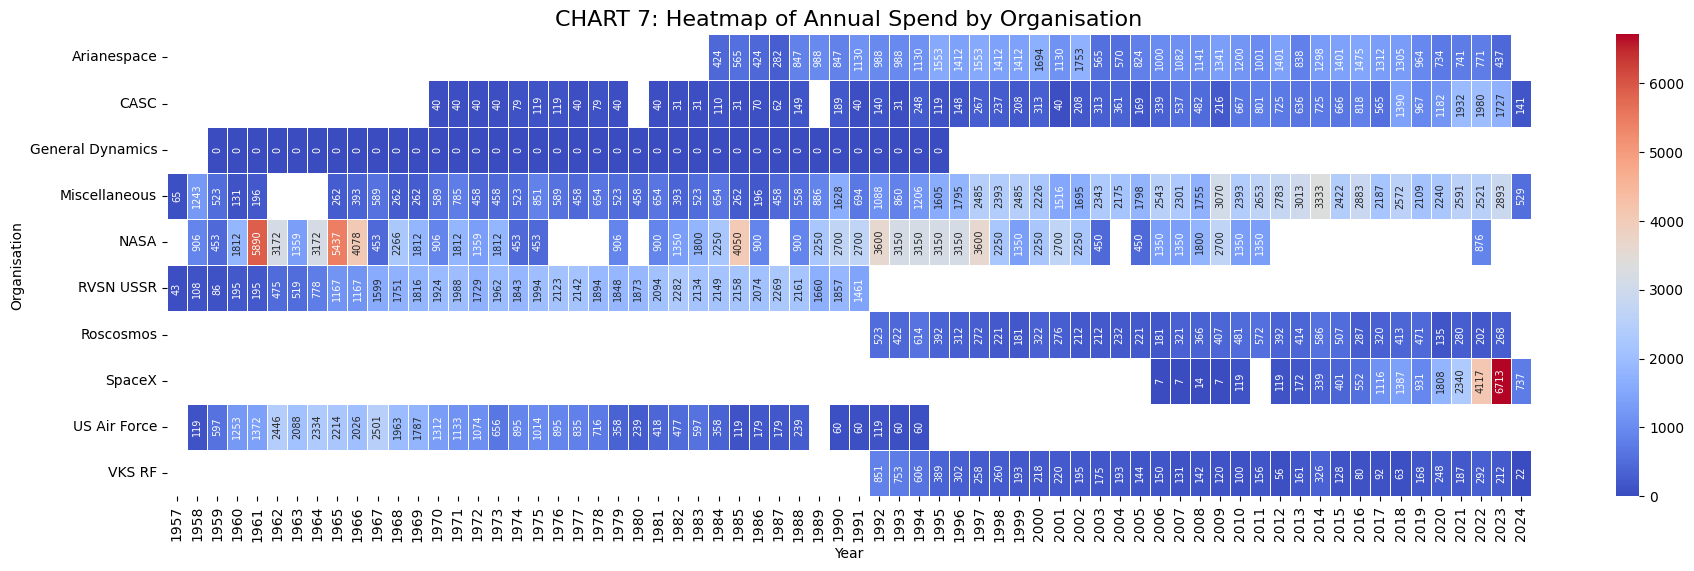

In [1205]:
# create a heatmap for the grouped mean price data subset to show annual spend by organisation
heatmap_data = subset_mean_grouped.groupby(["Organisation", "Year"])["Price"].sum().round(0).unstack()

plt.figure(figsize=(22,6))
sns.heatmap(heatmap_data,annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5, annot_kws={"size":7,"rotation": 90})

plt.title("CHART 7: Heatmap of Annual Spend by Organisation", fontsize=16)
plt.show()

# <span style="font-size:24px; color:orange;">CHART 7 ANALYSIS: HEATMAP OF ANNUAL SPEND, BY ORGANISATION 'MEAN PRICE VALUES'
The areas of white denote years when organisations were not actively undertaking space missions.  Again, General Dynamics data is flawed as there is no price data for any records held, hence it reports a 0 spend per annum despite being active from 1959 through to 1996.
In recent years, the heatmap shows that SpaceX has incurred the highest annual spend values, namely in 2022 and 2023.  Prior to this NASA incurred the greatest annual spend, mainly during the cold war eyars where mission spending was at its highest (1961, 1965 & 1966). Despite Russia's high levels of mission activity, across the years, they have shown relatively low annual spending levels in comparison to the USA.
Reviewing the heatmap also revealed a gap in NASA's activity from 2012 to 2021. Having fact checked this, the dataset is clearly incomplete as NASA were active between these dates (e.g. Perseverance in 2020 and MAVEN in 2014), however, missions were significantly less over this period.

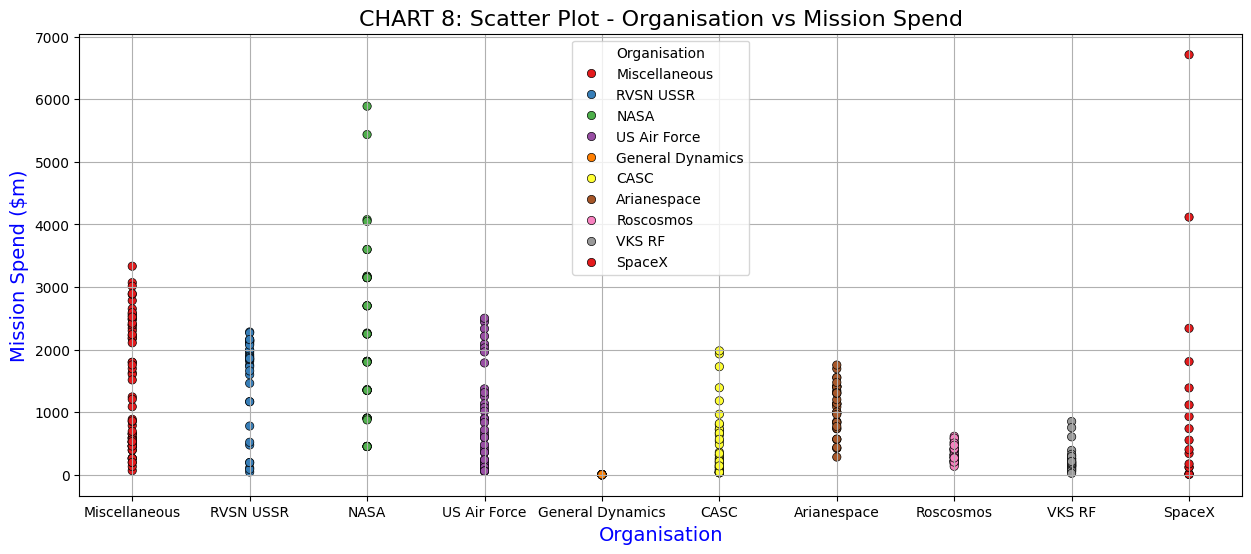

In [1206]:
#Plot a scatter chart to demonstrate range of mission spend by organisation
plt.figure(figsize=(15,6))

sns.scatterplot(data=subset_mean_grouped, x='Organisation', y='Price', hue='Organisation', palette='Set1', edgecolor='black')

plt.title("CHART 8: Scatter Plot - Organisation vs Mission Spend", fontsize=16)
plt.xlabel("Organisation", fontsize=14, color='blue')
plt.ylabel("Mission Spend ($m)", fontsize=14, color='blue')
plt.grid(True)

plt.show()

# <span style="font-size:24px; color:orange;">CHART 8 ANALYSIS: SCATTER PLOT - ORGANISATIONS VS MISSION SPEND
This scatter plot demonstrates the range of mission cost by organisation.  Evidently, NASA and SpaceX have the greatest ranges, with NASA realising mission costs of nearly 6bn and SpaceX with nearly 7bn. Conversely Roscosmos mission costs have a lower variance and are relatively small in price range.  This could, however, be due to the lack of price data for this organisation and the fact that mean price data had to be used significantly more in the calculations.  

The next stage of analysis would look at success rates by Organisation, in an attempt to determine which space organisations were the most or least successful. 

Text(0, 0.5, 'Number of Missions')

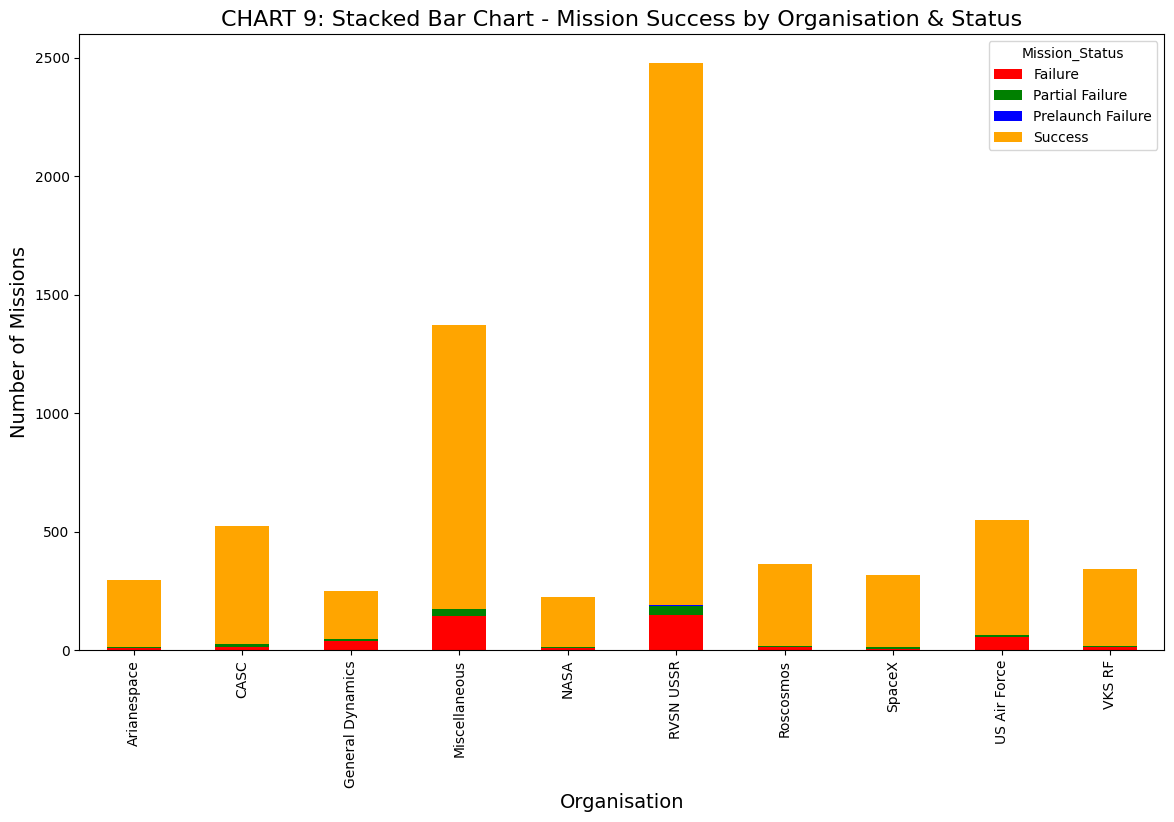

In [1207]:
# Create a stacked bar chart which shows mission status by organisation 
mission_counts = missions_df.groupby(['Organisation', 'Mission_Status']).size().unstack(fill_value=0)

ax = mission_counts.plot(kind='bar', stacked=True, figsize=(14,8), color=['red', 'green', 'blue', 'orange'])

plt.title("CHART 9: Stacked Bar Chart - Mission Success by Organisation & Status", fontsize=16)
plt.xlabel("Organisation", fontsize=14)
plt.ylabel("Number of Missions", fontsize=14)

# <span style="font-size:24px; color:orange;">CHART 9 ANALYSIS: SUCCESS & FAILURE BY ORGANISATION
Chart 9 demonstrates that Russia boasts the greatest success rate.  With the greatest mission count, clearly a vast proportion of missions have been reported as successes. The smaller, miscellaneous missions, have the highest failure rates as a proprtion of total missions.


In [1208]:
missions_df['Year'] = missions_df['Year'].dt.year

space_loc_count = missions_df.groupby(['Year', 'Organisation', 'Location']).size().reset_index(name='Annual Mission Count')

space_loc_count.head()

,Year,Organisation,Location,Annual Mission Count
0,1957,Miscellaneous,"LC-18A, Cape Canaveral SFS, Florida, USA",1
1,1957,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2
2,1958,Miscellaneous,"Inyokern, China Lake, California, USA",6
3,1958,Miscellaneous,"LC-18A, Cape Canaveral SFS, Florida, USA",6
4,1958,Miscellaneous,"LC-26A, Cape Canaveral SFS, Florida, USA",2


In [1209]:
space_loc_count = space_loc_count[space_loc_count['Organisation'] !='Miscellaneous']

space_loc_count.sample(50)

,Year,Organisation,Location,Annual Mission Count
1874,2020,CASC,"LC-9, Taiyuan Satellite Launch Center, China",6
1654,2014,Arianespace,"ELS, Guiana Space Centre, French Guiana, France",4
336,1971,US Air Force,"SLC-4W, Vandenberg SFB, California, USA",4
227,1968,US Air Force,"SLC-10W (75-2-6), Vandenberg SFB, California, USA",2
570,1980,General Dynamics,"SLC-36A, Cape Canaveral SFS, Florida, USA",2
1820,2018,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",6
681,1983,US Air Force,"SLC-2W, Vandenberg SFB, California, USA",2
1248,2001,NASA,"LC-39A, Kennedy Space Center, Florida, USA",3
1682,2014,VKS RF,"Site 35/1, Plesetsk Cosmodrome, Russia",2
763,1986,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",7


In [1210]:
# Splitting the 'Location' column into separate address columns to access Country data
space_loc_count[['Address1', 'Address2', 'Address3', 'Address4']] = space_loc_count['Location'].str.split(',', expand=True)

space_loc_count['All_Countries'] = space_loc_count['Address4'].replace('', np.nan).fillna(space_loc_count['Address3'])

space_loc_count.sample(100)

,Year,Organisation,Location,Annual Mission Count,Address1,Address2,Address3,Address4,All_Countries
1546,2010,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",8,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None,Kazakhstan
885,1990,NASA,"LC-39B, Kennedy Space Center, Florida, USA",3,LC-39B,Kennedy Space Center,Florida,USA,USA
19,1960,General Dynamics,"LC-12, Cape Canaveral SFS, Florida, USA",2,LC-12,Cape Canaveral SFS,Florida,USA,USA
1787,2018,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",6,ELA-3,Guiana Space Centre,French Guiana,France,France
642,1982,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",3,Site 32/1,Plesetsk Cosmodrome,Russia,None,Russia
...,...,...,...,...,...,...,...,...,...
1514,2009,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",1,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None,Kazakhstan
1415,2006,NASA,"LC-39B, Kennedy Space Center, Florida, USA",3,LC-39B,Kennedy Space Center,Florida,USA,USA
213,1968,NASA,"SLC-37B, Cape Canaveral SFS, Florida, USA",1,SLC-37B,Cape Canaveral SFS,Florida,USA,USA
1939,2021,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None,Kazakhstan


In [1211]:
# Insert a heat map diagram which demonstrates the number of misssions each year by country.

# create a copy of the subframe
space_loc_count_df = space_loc_count

# group the required data and reset the index
space_loc_count_df_grouped = space_loc_count_df.groupby(['Year', 'All_Countries'])['Annual Mission Count'].sum().reset_index()

# plot annual missions by location
fig = px.choropleth(space_loc_count_df_grouped,
                    locations="All_Countries",
                    locationmode="country names",
                    color="Annual Mission Count",
                    animation_frame="Year",
                    color_continuous_scale="Plasma",
                    title="CHART 10: Annual Space Missions by Location")

# change figure size
fig.update_layout(
    width=1200,
    height=800,
    title_font_size=20,
)

fig.show()


# <span style="font-size:24px; color:orange;">CHART 10 ANALYSIS: ANNUAL SPACE MISSIONS BY LOCATION, OVER TIME
Chart 10 demonstrates that Russia and Khazakstan (formerly part of the USSR) initially had the greatest mission frequency alongside the USA, findings which correlate with the beginnning of the space race.  However, towards the end of the reporting period, the USA are reporting far more missions, with 98 in 2023, compared to China with 46 and Russia with only 10.  The rapid rise of SpaceX is likely attributable to the high relative mission frequency of the USA, although it is worth noting that Russia have been at war in recent years which has reportedly impacted its capacity to conduct missions (www.space.com)

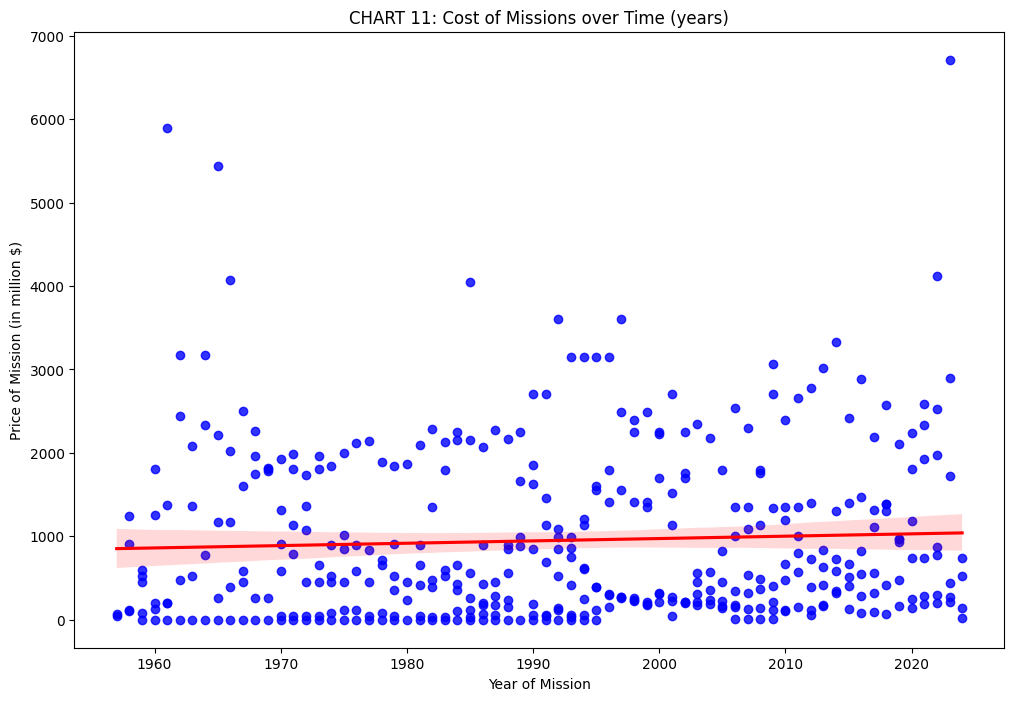

In [1212]:
mission_counts_reg = subset_mean_grouped

plt.figure(figsize=(12,8))
sns.regplot(x=mission_counts_reg['Year'], y=mission_counts_reg['Price'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('CHART 11: Cost of Missions over Time (years)')
plt.xlabel('Year of Mission')
plt.ylabel('Price of Mission (in million $)')
plt.show()

# <span style="font-size:24px; color:orange;">CHART 11 ANALYSIS: MISSION COSTS OVER TIME
The final stage of analysis sought to explore any trends between missions cost over time.  Chart 11 looked to explore whether any relationship between cost and time exists, and if so, could any predictions be made regarding future mission costs.  Unfortuantely, the regression line created was relatively level which did not provide any useful correlation. I had expected to see costs increase proprtionately over time, recognising increased labour charges, inflationary rises and material price increases, however, the chart did not demonstrate this.  We could, therefore, assume that the price data has already been adjusted for inflation and has been reported in the dataset at today's costs.  This would then explain why the mission costs are showing as relatively stable over the 70 years, hence why the regession line shows neither a positive or negative correlation.  There could also be an argument to say that utilising mean price data has skewed the results, which had we had actual price figures for every missions, hence a complete dataset, we would have been reporting very different trends.


# <span style="font-size:24px; color:orange;">CONCLUSIONS
My learning journey through space clearly hasn't been straightforward, however, its challenges have tested me and definitely developed my python data analysis abilities. The original dataset, although relatively small, proved to be problematic, with significant amounts of missing data, incorrect data formats and vast quantities of negligble information relating to smaller space organisations with limited activity.  Subsequently, I have learned a significant amount about data cleaning and been able to compare results from removing incomplete records versus imputation of data to provide reasonable estimates and preserve more of the dataset. 
In conclusion, choose your data wisely!! It may look accurate and comprehensive at first but analysis will reveal hidden problems and challenges. It will, however, teach you patience and lot of new expletives!

![Mission Success Image](https://static.vecteezy.com/system/resources/previews/023/089/000/original/mission-accomplished-rubber-stamp-seal-vector.jpg)